# Dose sensitivity with respect to weight factors and dose parameters

In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
colors = sns.color_palette()

sys.path.append('../src')
import raybay

In [2]:
def plotCompareD2cm(folder, labels=True, legend=False):
    # Load data
    weight = np.load(folder + '/weight/res_weight.pkl', allow_pickle=True)
    dose = np.load(folder + '/weight/res_dose.pkl', allow_pickle=True)
    limit = dose.opt_result.x_iters[-1][0]/100
    
    # Plot dose results
    fig, ax1 = plt.subplots()
    pars = [ii[0] for ii in dose.opt_result.x_iters]
    h1, = ax1.plot([pars[ii]/100 for ii in range(1,10)],
                   [dose.goal_dict[1][ii]/100 for ii in range(1,10)], '.', color=colors[0])
    h2, = ax1.plot([0, limit], [limit, limit], ':', color=colors[2])
    ax1.set_xticks(np.linspace(0, limit, 6))
    ax1.tick_params(axis='x', colors=colors[0])
    
    # Plot weight results
    ax2 = ax1.twiny()
    h3, = ax2.plot(weight.opt_result.x_iters,
                   [weight.goal_dict[1][ii]/100 for ii in range(10)], '.', color=colors[1])
    ax2.set_xscale('log')
    ax2.tick_params(axis='x', colors=colors[1])
    ax2.grid(False)
    
    # Annotations
    if labels:
        ax1.set_xlabel(r'D2cm Parameter ($\theta_2$)')
        ax2.set_xlabel(r'D2cm Weight ($w_2$)')
        ax1.set_ylabel('D2cm MaxDose (Gy)')
        if legend:
            ax1.legend([h3, h1, h2], ['$w_2$', r'$\theta_2$', '$\gamma_2$'], bbox_to_anchor=(1, 1))
    else:
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax2.set_xticklabels([])
        if legend:
            ax1.legend([h3, h1, h2], ['', '', ''], bbox_to_anchor=(1, 1), frameon=False)

<Figure size 432x288 with 0 Axes>

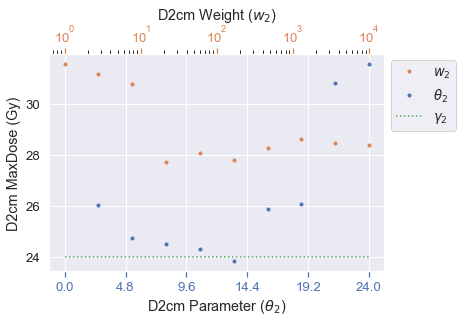

<Figure size 432x288 with 0 Axes>

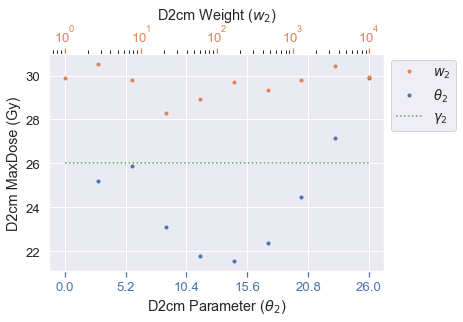

<Figure size 432x288 with 0 Axes>

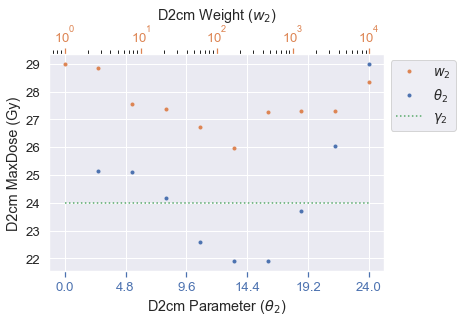

<Figure size 432x288 with 0 Axes>

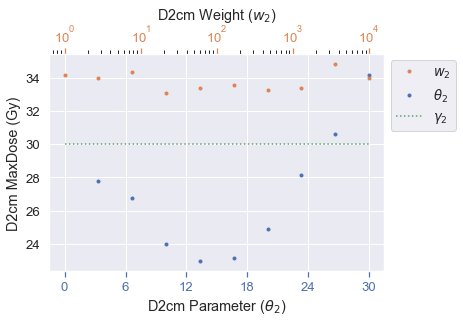

<Figure size 432x288 with 0 Axes>

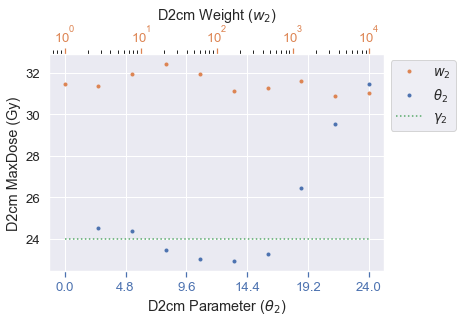

In [3]:
folders = ['SBRT_lung_minsun', 'ZZ_MK_LLungSBRT3778', 'ZZ_MK_RLungSBRT4076',
           'ZZ_MK_RULungSBRT3796', 'ZZ_MK_RLSBRT1931']
for ii in range(len(folders)):
    plt.figure()
    plotCompareD2cm(folders[ii], legend=True)
    plt.savefig(f"fig1{chr(ii + 97)}.png", bbox_inches='tight', dpi=300)